In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [20]:
df=pd.read_csv('C:/Users/unix/Desktop/Data Science/Python/NCHS.csv')
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7


In [21]:
df.tail()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
15023,2015,Septicemia (A40-A41),Septicemia,Virginia,1187.0,13.0
15024,2015,Septicemia (A40-A41),Septicemia,Washington,501.0,6.3
15025,2015,Septicemia (A40-A41),Septicemia,West Virginia,348.0,13.9
15026,2015,Septicemia (A40-A41),Septicemia,Wisconsin,517.0,7.2
15027,2015,Septicemia (A40-A41),Septicemia,Wyoming,46.0,7.1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15028 entries, 0 to 15027
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     15028 non-null  int64  
 1   113 Cause Name           15028 non-null  object 
 2   Cause Name               15028 non-null  object 
 3   State                    15028 non-null  object 
 4   Deaths                   15013 non-null  float64
 5   Age-adjusted Death Rate  14917 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 704.6+ KB


In [23]:
df.describe()

,Year,Deaths,Age-adjusted Death Rate
count,15028.000000,1.501300e+04,14917.000000
mean,2007.000000,1.023261e+04,86.526393
std,4.899142,9.003261e+04,190.764950
min,1999.000000,1.000000e+01,1.300000
25%,2003.000000,2.940000e+02,8.300000
50%,2007.000000,8.380000e+02,18.900000
75%,2011.000000,2.737000e+03,46.300000
max,2015.000000,2.712630e+06,1087.300000


In [24]:
df.drop(df[df['Cause Name']=='All Causes'].index,inplace=True)

In [25]:
df.shape

(14144, 6)

In [26]:
df['Cause Name'].unique()

array(['Unintentional Injuries', "Alzheimer's disease", 'Homicide',
       'Stroke', 'Chronic liver disease and cirrhosis', 'CLRD',
       'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(14033, 6)

<AxesSubplot:>

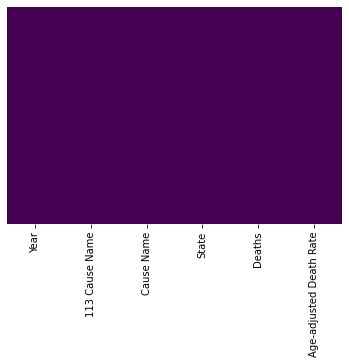

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
print('The number of deaths in the United States from 1999 to 2015 is:', df.loc[df['State'] == 'United States',['Deaths']].sum())

The number of deaths in the United States from 1999 to 2015 is: Deaths    34640315.0
dtype: float64


In [31]:
a=df.groupby(['Year']).sum()
a

,Deaths,Age-adjusted Death Rate
Year,,
1999,4052876.0,38550.3
2000,4054097.0,38136.3
2001,4063971.0,37645.3
2002,4104796.0,37503.0
2003,4097245.0,36904.3
2004,3999321.0,35359.7
2005,4062908.0,35368.7
2006,3990647.0,34113.0
2007,3979212.0,33405.3


Text(0, 0.5, 'Number of Deaths')

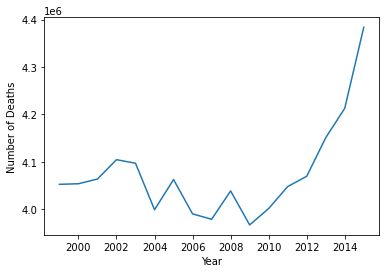

In [32]:
a['Deaths'].plot()
plt.ylabel('Number of Deaths')

In [33]:
from matplotlib.pyplot import figure

In [41]:
a = df[df['State'] != 'United States']
a1 = a.groupby(['State']).sum()
a1.sort_values('Deaths',ascending =False, inplace =True)
a1.head(10)

,Year,Deaths,Age-adjusted Death Rate
State,,,
California,545904,3422459.0,10101.2
Florida,545904,2397507.0,10156.8
Texas,545904,2270961.0,11339.7
New York,545904,2170019.0,10226.5
Pennsylvania,545904,1785982.0,11334.1
Ohio,545904,1529552.0,11931.3
Illinois,545904,1460489.0,11170.8
Michigan,545904,1248155.0,11645.7
North Carolina,545904,1063835.0,11737.3


<AxesSubplot:title={'center':'Top 10 states with the highest deaths'}, xlabel='State'>

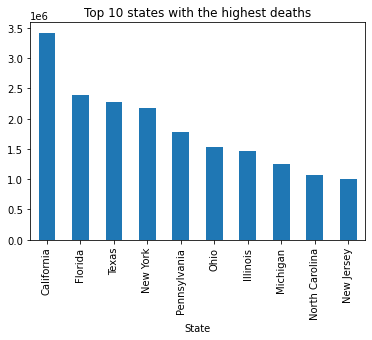

In [42]:
a1['Deaths'].head(10).plot.bar(title = 'Top 10 states with the highest deaths')

In [43]:
a1 = a.groupby(['Cause Name']).sum()
a1.sort_values('Deaths',ascending =False, inplace =True)
a1.head(10)


,Year,Deaths,Age-adjusted Death Rate
Cause Name,,,
Diseases of Heart,1740069,10939923.0,174817.3
Cancer,1740069,9646498.0,157107.6
Stroke,1740069,2437998.0,40672.7
CLRD,1740069,2280130.0,38818.7
Unintentional Injuries,1740069,2016510.0,36713.7
Alzheimer's disease,1740069,1257309.0,21042.8
Diabetes,1740069,1236321.0,20459.0
Influenza and pneumonia,1740069,987432.0,16181.1
Kidney Disease,1740069,757934.0,12315.0


Text(0, 0.5, 'Number of Deaths')

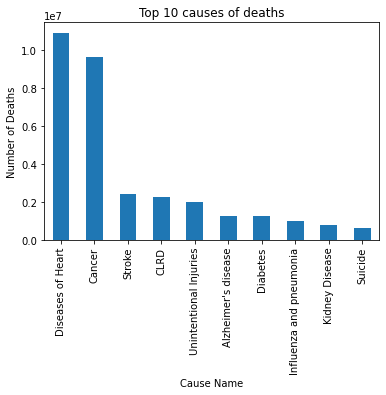

In [45]:
a1['Deaths'].head(10).plot.bar(title = 'Top 10 causes of deaths')
plt.ylabel('Number of Deaths')